In [70]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn.metrics import normalized_mutual_info_score as nmi

from robust_spectral_clustering import RSC

import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
X, y = datasets.make_moons(200, shuffle=False, random_state=4, noise=0.1) 
n_normal = X.shape[0]
X = np.concatenate([X, np.random.rand(10, 2)*5.0], axis=0) # outliers 
y = np.concatenate([y, np.ones((10, ), dtype=int)*2] )
n_outliers = 10 
k = 2
nn = 15
print(y)
print(k)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
2


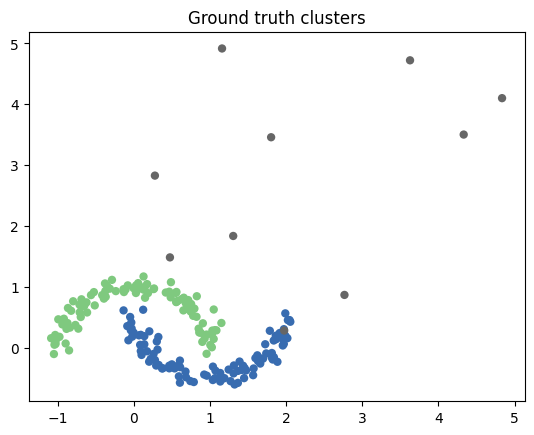

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent', linewidths=0)
plt.title('Ground truth clusters');

In [73]:
best = [0, 0]
# for theta in [1, 10, 20, 50, 100, 200]:
#     for m in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
from itertools import product 
nns = [15] # number of neighbours to consider for constructing the KNN graph (excluding the node itself)
thetas = [20]     # number of corrupted edges to remove/2 = theta
ms= [0.1, 0.2, 0.3, 0.4, 0.5]  # minimum  percentage of neighbours will be removed for each node (omega_i constraints)
for nn, theta, m in product(nns, thetas, ms): 
    try:
        #   print(f"*** theta: {theta}, m={m}")
        rsc = RSC(k=k, nn=nn, theta=theta, m=m, verbose=False)
        y_rsc = rsc.fit_predict(X)
        # print(y_rsc)
        nmi_rsc = nmi(y, y_rsc)

        sc = SpectralClustering(n_clusters=k, n_neighbors=nn+1, affinity='nearest_neighbors')  # nn+1 since they include self
        y_sc = sc.fit_predict(X)
        # print(y_sc)
        nmi_sc = nmi(y, y_sc)
    #         print('Vanilla Spectral Clustering NMI: {:.4f}\n Robust Spectral Clustering NMI: {:.4f}'.format(nmi(y, y_sc), nmi(y, y_rsc)))

        if nmi_rsc > best[0]:
            best = [nmi_rsc, nmi_sc, nn, theta, m, y_rsc, y_sc]
    except Exception as e:
        print(e, nn, theta)
print(best)

[0.711143314907029, 0.2927479957650492, 15, 20, 0.5, array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int32), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 

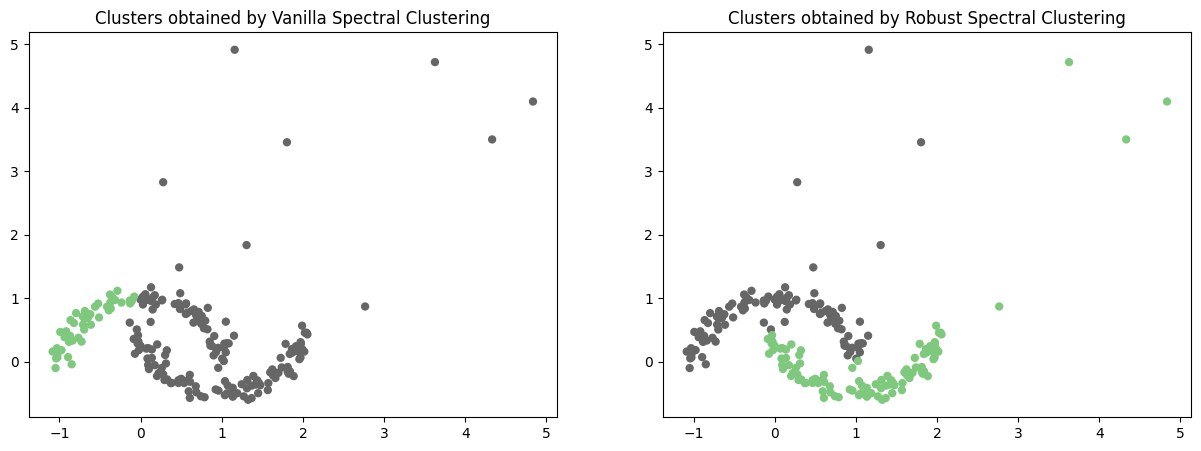

In [74]:
y_sc, y_rsc = best[-1], best[-2]
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].scatter(X[:, 0], X[:, 1], c=y_sc, cmap='Accent', linewidths=0)
ax[0].set_title('Clusters obtained by Vanilla Spectral Clustering')

ax[1].scatter(X[:, 0], X[:, 1], c=y_rsc, cmap='Accent', linewidths=0)
ax[1].set_title('Clusters obtained by Robust Spectral Clustering');

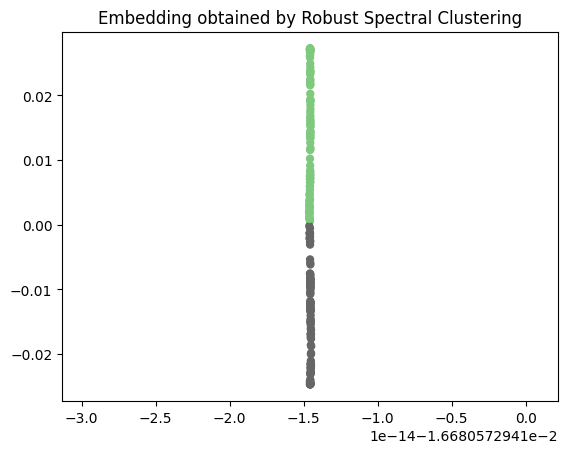

In [75]:
plt.scatter(rsc.H[:, 0], rsc.H[:, 1], c=y_rsc,  cmap='Accent', linewidths=0)
plt.title('Embedding obtained by Robust Spectral Clustering');